# Assignment 5



## First Question 

#### <u>Summary of Section 2 (Barker's Method)<u>

We are working on the cases when MH-ratio can not be evaluated. We will be using Bernoulli factories to sample from $ Bern(\alpha(x,y)) $. We have also modified the algorithm a bit to i.e. accept proposal if we get success in Bernoulli trial and otherwise.                        
$ \alpha_{B}(x,y) = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)} $              
We will be using 2-coin algorithm to sample from $ Bern(\alpha(x,y)) $. We found a bound for $ \pi(y)q(y,x) $ as $ c_{y} $ and then get $ p_{y} = \pi(y)q(y,x)c_{y}^{-1} $. Similarly for $p_{x}$. 
Now, $\alpha_{B}(x,y) = \frac{c_{y}p_{y}}{c_{x}p_{x}+c_{y}p_{y}} $
We did show in assignment 2 that 2-coin algorithm gives a sample from $ Bern(\alpha(x,y)) $. Here is a copy of it.

Probability of getting success(output 1) in first iteration $ = Pr(C_{1}=1,C_{2}=1) $        
$ = Pr(C_{1}=1)*Pr(C_{2}=1) $           
$ = \frac{c_{y}p_{y}}{c_{x}+c_{y}} $          

Probability of getting stuck in loop for one iteration $ = Pr(C_{1}=1,C_{2}=0)+Pr(C_{1}=0,C_{2}=0) $                           
$ = \frac{c_{y}*(1-p_{y})}{c_{x}+c_{y}} + \frac{c_{x}*(1-p_{x})}{c_{x}+c_{y}} $           
$ = 1 - \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}} $         

Probability of getting success(output 1) $ = \sum_{j=0}^{+\infty} $ j  iterations*success                
$ = \sum_{j=0}^{+\infty} (1 - \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}})^{j}*\frac{c_{y}p_{y}}{c_{x}+c_{y}} $            
$ = \frac{1}{\frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}}}*\frac{c_{y}p_{y}}{c_{x}+c_{y}}  $    
$ = \frac{c_{y}p_{y}}{c_{x}p_{x}+c_{y}p_{y}} $             

And loops will be of the form Geom(1 - ($ 1 - \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}} $) ) = Geom($ \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}} $ ).
And mean execution time will be expectation of Geometric distribution = 1/parameter = $\frac{c_{x}+c_{y}}{c_{x}p_{x} + c_{y}p_{y}}$

#### <u>Summary of Section 3 (Portkey Barker's method)<u>

$ \alpha(x,y) = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)+d(x,y)} $  
We choose $d(x,y)=d(y,x)= \frac{(1-\beta)}{\beta}(c_{x}+c_{y})$
$\beta$ is about acceptance. $1-\beta$ is about immediate rejections. This way many a times the loop ends in the first step and it reduces computation time. However this comes at the cost of statistical accuracy. We want to keep $\beta$ close to one for better samples.                                            
Similar calculations as above lead to the required probability. Special thing about this is that the mean execution time is bounded above.

#### <u>Summary of Section 4 (Flipped Portkey Barker's method)<u>

In flipped portkey, we use inverse of the distributions. It is used in cases when it is easier to know minimum of the distributions. We write $\pi(y)^{-1}q(y,x)^{-1} = \tilde{c}_y\tilde{p}_y $. Similarly for x.                                                                           
                                                      $d(x,y)= \frac{(1-\beta)}{\beta}\frac{\tilde{c}_x +\tilde{c}_y}{\tilde{c}_x\tilde{p}_x\tilde{c}_y\tilde{p}_y}$. This way The 2-coin algorithm remains almost similar except some minor changes.

## Second Question

$ bound \ c_{\theta} = \frac{k}{e\theta} $


In [1]:
using StatsBase                                                                 #importing relevant libraries
using Distributions
using StatsPlots
using SpecialFunctions

In [2]:
## This is Algorithm 3 
function two_coin(x,y,beta,k)                          #x is current sample and y is the proposed sample
    cy = k/(exp(1)*y)                                  # Calculating upper bounds
    cx = k/(exp(1)*x)

    while true
        S = rand(Binomial(1,beta))
        if S == 0
            return x
        else 
            C1 = rand(Binomial(1,cy/(cx+cy)))
            if C1 == 1
                lambda = rand(Gamma(10,1/100))
                py = pdf(Weibull(k,lambda),y)/cy              
                C2 = rand(Binomial(1,py))
                if C2 == 1
                    return y
                end
            else
                lambda = rand(Gamma(10,1/100))
                px = pdf(Weibull(k,lambda),x)/cx
                C2 = rand(Binomial(1,px))
                if C2 == 1
                    return x
                end
            end
        end
    end
end

two_coin (generic function with 1 method)

In [3]:
function MCMC(N,beta,k)
    chain = fill(0.0,N)
    chain[1] = 0.095                                    
    for i in 2:N
        prop = rand(Normal(chain[i-1],sqrt(0.001)))
        if prop < 0
            chain[i]=chain[i-1]                              # this is not ideal for our 2-coin algorithm, so we reject it here itself
        else
        chain[i] = two_coin(chain[i-1],prop,beta,k)
        end
    end
    return chain
end


MCMC (generic function with 1 method)

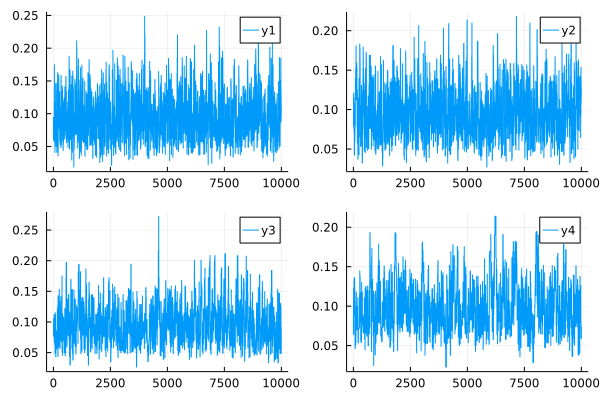

In [55]:
N = Int(10000)
k = 10
plot([MCMC(N,1,k) , MCMC(N,0.95,k), MCMC(N,0.90,k), MCMC(N,0.82,k)], layout = grid(2, 2))

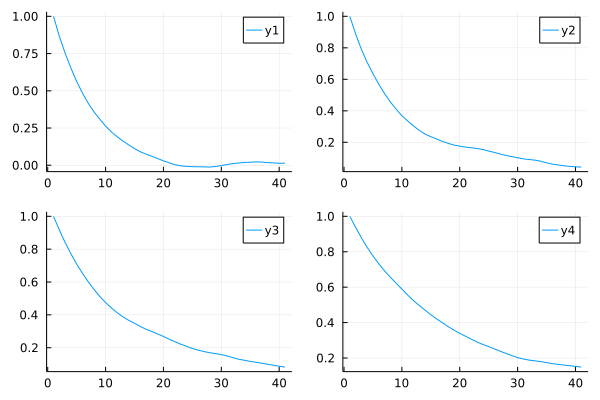

In [59]:
plot([autocor(MCMC(N,1,k)) , autocor(MCMC(N,0.95,k)), autocor(MCMC(N,0.90,k)), autocor(MCMC(N,0.82,k))], layout = grid(2, 2))

The quality of sample decreases as we decrease $\beta$.

### Thank You very much